In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn

import statsmodels


import sklearn
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#Steps followed

1) Data Visualization

2) Data Preparation
   
    i. Dummy Variables
   
    ii. Rescaling
   
    iii. train test split

3) Feature Selection
   
    i. Course tuning - RFE
   
    ii. Fine tuning - Manual


4) Model Evaluation

# 1. Data Visualisation #

In [2]:
df_bikesharing = pd.read_csv('day.csv')
df_bikesharing.shape

(730, 16)

In [3]:
df_bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


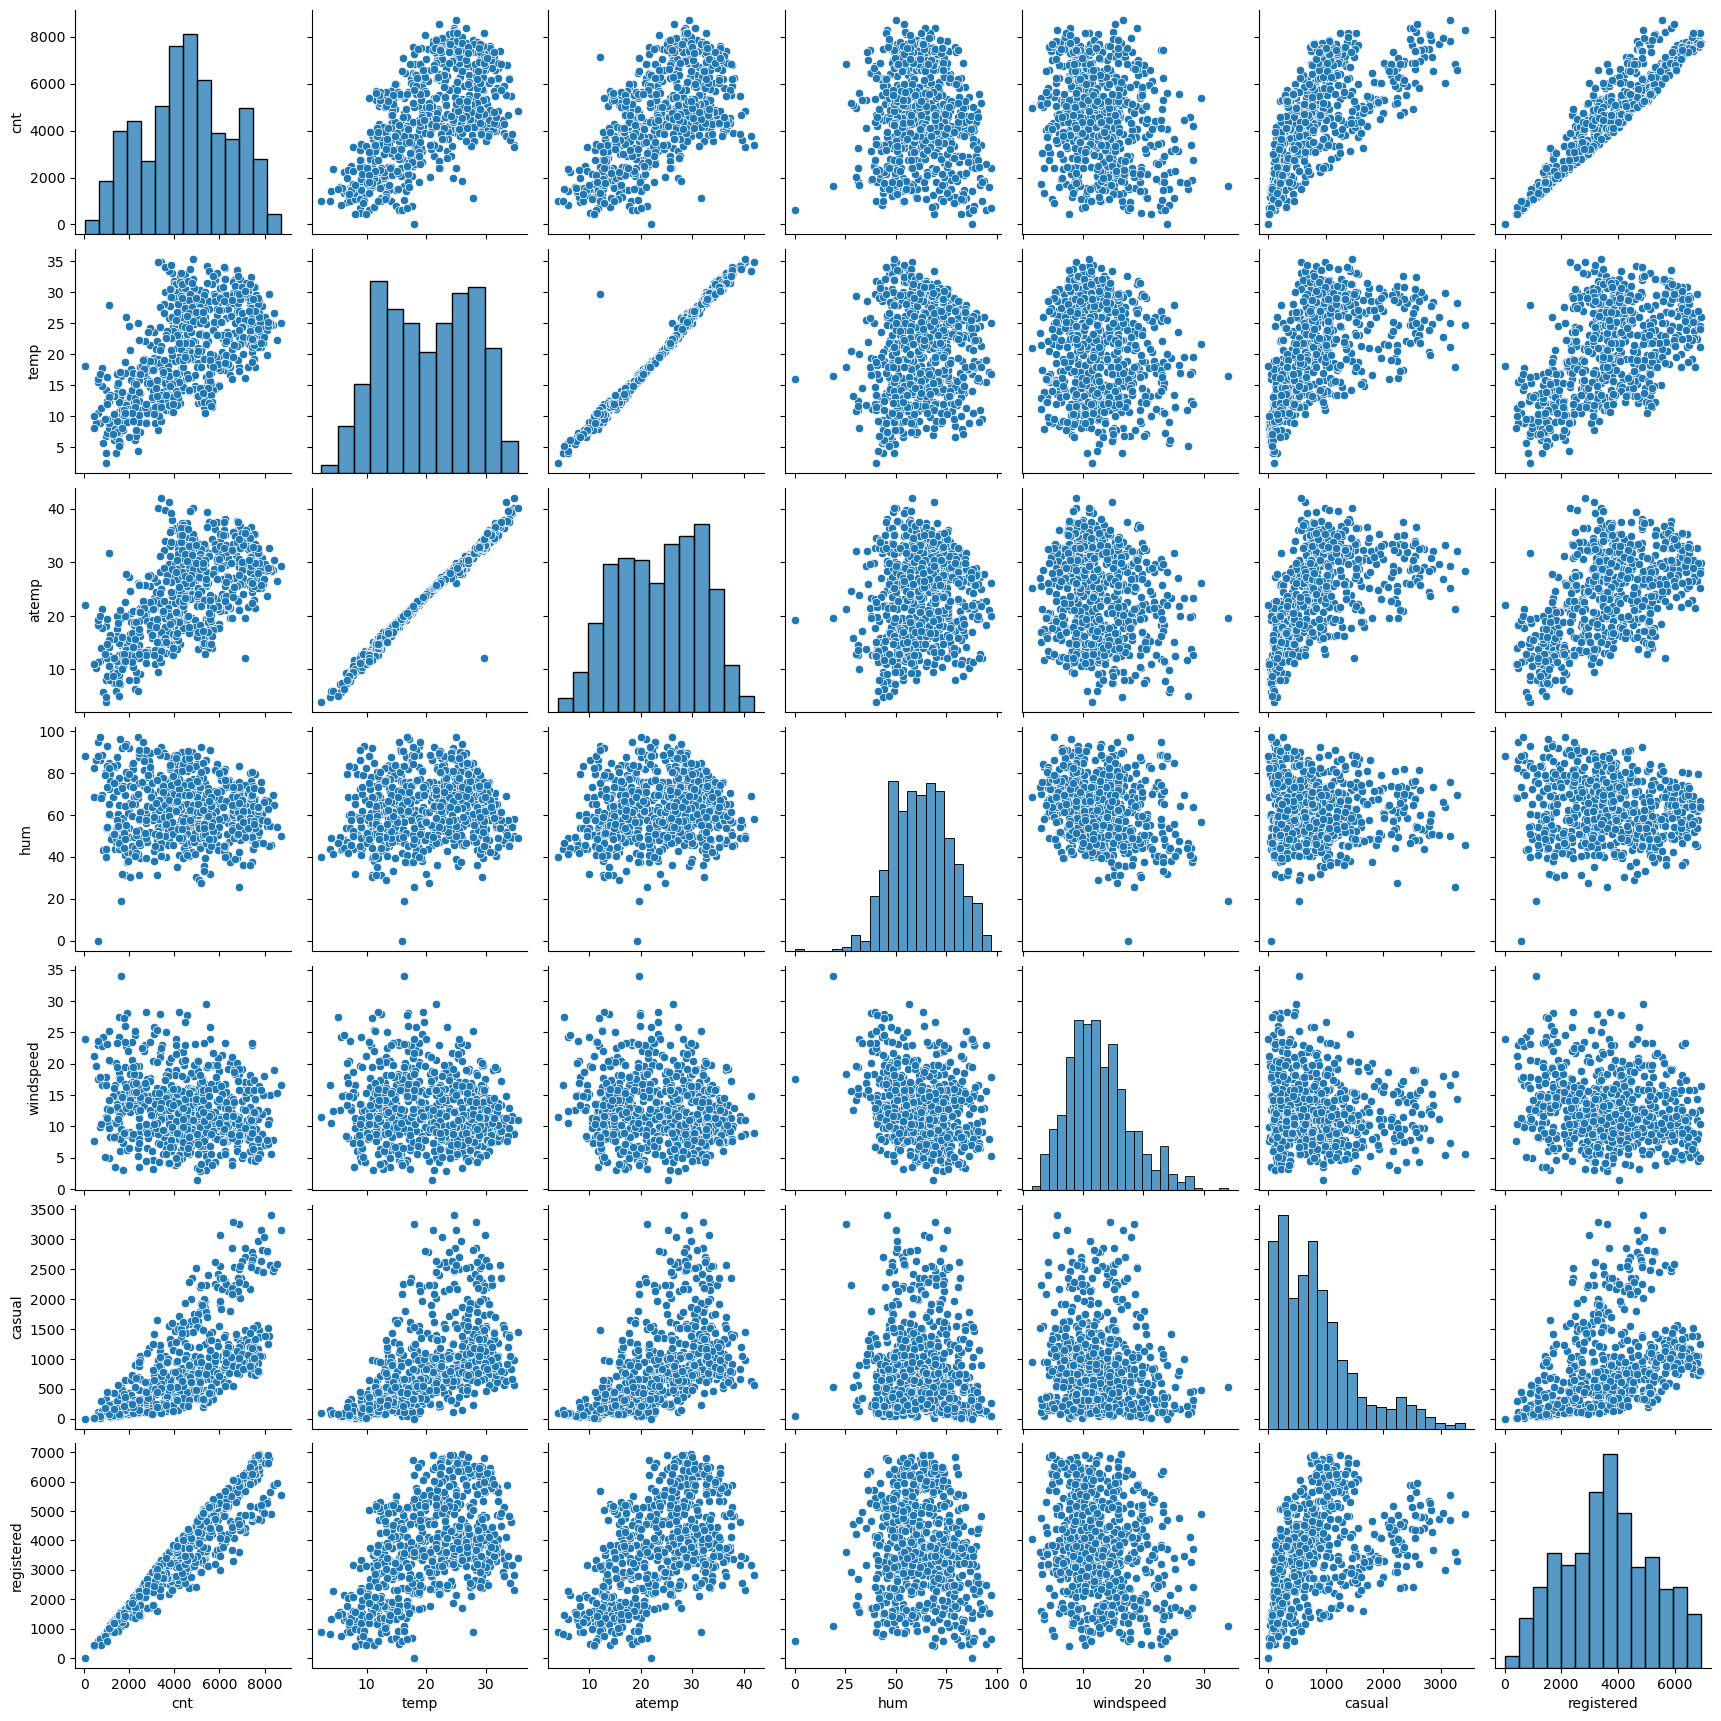

In [6]:
numeric_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered']
sn.pairplot(df_bikesharing[numeric_cols])

In [7]:
df_bikesharing[numeric_cols].corr

<bound method DataFrame.corr of       cnt       temp     atemp      hum  windspeed  casual  registered
0     985  14.110847  18.18125  80.5833  10.749882     331         654
1     801  14.902598  17.68695  69.6087  16.652113     131         670
2    1349   8.050924   9.47025  43.7273  16.636703     120        1229
3    1562   8.200000  10.60610  59.0435  10.739832     108        1454
4    1600   9.305237  11.46350  43.6957  12.522300      82        1518
..    ...        ...       ...      ...        ...     ...         ...
725  2114  10.420847  11.33210  65.2917  23.458911     247        1867
726  3095  10.386653  12.75230  59.0000  10.416557     644        2451
727  1341  10.386653  12.12000  75.2917   8.333661     159        1182
728  1796  10.489153  11.58500  48.3333  23.500518     364        1432
729  2729   8.849153  11.17435  57.7500  10.374682     439        2290

[730 rows x 7 columns]>

### Removing outliers

0.25     9.041650
0.50    12.125325
0.75    15.625589
0.95    22.999988
0.98    25.201627
Name: windspeed, dtype: float64
(730, 16) (715, 16)


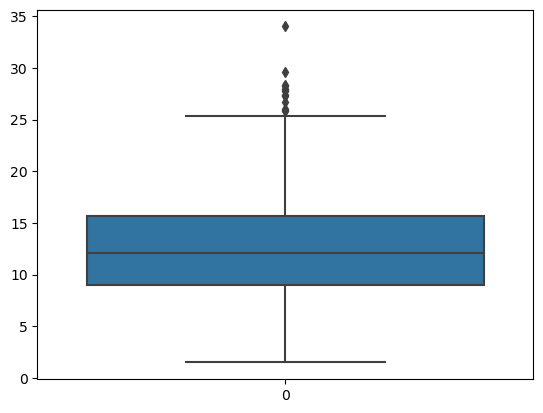

In [8]:
sn.boxplot(df_bikesharing['windspeed'])
print(df_bikesharing['windspeed'].quantile([0.25,0.50,0.75,0.95,0.98]))
print(df_bikesharing.shape, df_bikesharing[df_bikesharing['windspeed']<25.20].shape)
# df_bikesharing = df_bikesharing[df_bikesharing['windspeed']<=25.20]

<Axes: >

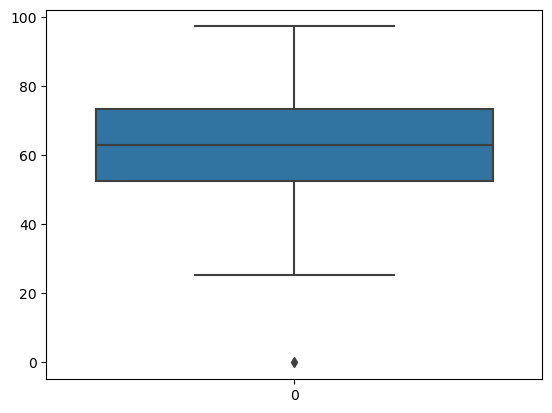

In [57]:
sn.boxplot(df_bikesharing['hum'])

<Axes: >

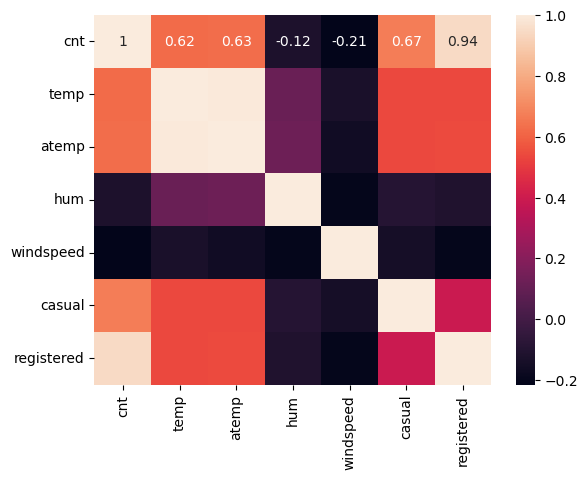

In [9]:
sn.heatmap(df_bikesharing[numeric_cols].corr(),annot=True)

## It is evident from the pair plot that some of the features like temp,atemp,registerd and casual have close to linear relationship with target varible 'cnt', so we can explore the possibilty of linear regerssion model fitting here

# 2. Data Preparation

## 2.1 Removing non useful columns

### Removing 'instant' feature as its just a serial number

In [10]:
df_bikesharing  = df_bikesharing.drop('instant',axis=1)

## Removing dtedate as same info seem to be covered by season,yr,mnth,holiday, weekday

In [11]:
df_bikesharing  = df_bikesharing.drop('dteday',axis=1)

## removing atemp as its highly correlated with temp

In [12]:
df_bikesharing  = df_bikesharing.drop('atemp',axis=1)

## removing casual and registerd as our target variable cnt = casual+registerd is mentioned in the problem, so all 3 are can be reffered as target varibales,thus dropping casual and registered

In [13]:
df_bikesharing  = df_bikesharing.drop(['casual','registered'],axis=1)
df_bikesharing.shape

(715, 11)

### 2.2 dummy variables

In [14]:
df_bikesharing_backup = df_bikesharing.copy(deep=True)

In [15]:
#df_bikesharing = df_bikesharing_backup

In [16]:
print(df_bikesharing['season'].value_counts())
temp = pd.get_dummies(df_bikesharing['season'],drop_first=True,dtype=int)
temp.columns = [('season_'+str(i)) for i in list(temp.columns)]
df_bikesharing = pd.concat([df_bikesharing,temp],axis=1)
df_bikesharing = df_bikesharing.drop('season',axis=1)
print(df_bikesharing.head())

season
3    188
2    181
4    175
1    171
Name: count, dtype: int64
   yr  mnth  holiday  weekday  workingday  weathersit       temp      hum  \
0   0     1        0        6           0           2  14.110847  80.5833   
1   0     1        0        0           0           2  14.902598  69.6087   
2   0     1        0        1           1           1   8.050924  43.7273   
3   0     1        0        2           1           1   8.200000  59.0435   
4   0     1        0        3           1           1   9.305237  43.6957   

   windspeed   cnt  season_2  season_3  season_4  
0  10.749882   985         0         0         0  
1  16.652113   801         0         0         0  
2  16.636703  1349         0         0         0  
3  10.739832  1562         0         0         0  
4  12.522300  1600         0         0         0  


In [17]:
print(df_bikesharing['weathersit'].value_counts())
temp = pd.get_dummies(df_bikesharing['weathersit'],drop_first=True,dtype=int)
temp.columns = [('weathersit_'+str(i)) for i in list(temp.columns)]
df_bikesharing = pd.concat([df_bikesharing,temp],axis=1)
df_bikesharing = df_bikesharing.drop('weathersit',axis=1)
print(df_bikesharing.head())

weathersit
1    451
2    243
3     21
Name: count, dtype: int64
   yr  mnth  holiday  weekday  workingday       temp      hum  windspeed  \
0   0     1        0        6           0  14.110847  80.5833  10.749882   
1   0     1        0        0           0  14.902598  69.6087  16.652113   
2   0     1        0        1           1   8.050924  43.7273  16.636703   
3   0     1        0        2           1   8.200000  59.0435  10.739832   
4   0     1        0        3           1   9.305237  43.6957  12.522300   

    cnt  season_2  season_3  season_4  weathersit_2  weathersit_3  
0   985         0         0         0             1             0  
1   801         0         0         0             1             0  
2  1349         0         0         0             0             0  
3  1562         0         0         0             0             0  
4  1600         0         0         0             0             0  


In [18]:
print(df_bikesharing['weekday'].value_counts())
temp = pd.get_dummies(df_bikesharing['weekday'],drop_first=True,dtype=int)
temp.columns = [('weekday_'+str(i)) for i in list(temp.columns)]
df_bikesharing = pd.concat([df_bikesharing,temp],axis=1)
df_bikesharing = df_bikesharing.drop('weekday',axis=1)
print(df_bikesharing.head())

weekday
0    103
2    103
1    102
3    102
4    102
5    102
6    101
Name: count, dtype: int64
   yr  mnth  holiday  workingday       temp      hum  windspeed   cnt  \
0   0     1        0           0  14.110847  80.5833  10.749882   985   
1   0     1        0           0  14.902598  69.6087  16.652113   801   
2   0     1        0           1   8.050924  43.7273  16.636703  1349   
3   0     1        0           1   8.200000  59.0435  10.739832  1562   
4   0     1        0           1   9.305237  43.6957  12.522300  1600   

   season_2  season_3  season_4  weathersit_2  weathersit_3  weekday_1  \
0         0         0         0             1             0          0   
1         0         0         0             1             0          0   
2         0         0         0             0             0          1   
3         0         0         0             0             0          0   
4         0         0         0             0             0          0   

   weekday_2  weekd

In [19]:
print(df_bikesharing['mnth'].value_counts())
temp = pd.get_dummies(df_bikesharing['mnth'],drop_first=True,dtype=int)
temp.columns = [('mnth_'+str(i)) for i in list(temp.columns)]
df_bikesharing = pd.concat([df_bikesharing,temp],axis=1)
df_bikesharing = df_bikesharing.drop('mnth',axis=1)
print(df_bikesharing.head())

mnth
5     62
7     62
8     62
12    61
1     60
6     60
9     60
10    60
3     59
11    59
4     58
2     52
Name: count, dtype: int64
   yr  holiday  workingday       temp      hum  windspeed   cnt  season_2  \
0   0        0           0  14.110847  80.5833  10.749882   985         0   
1   0        0           0  14.902598  69.6087  16.652113   801         0   
2   0        0           1   8.050924  43.7273  16.636703  1349         0   
3   0        0           1   8.200000  59.0435  10.739832  1562         0   
4   0        0           1   9.305237  43.6957  12.522300  1600         0   

   season_3  season_4  ...  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  \
0         0         0  ...       0       0       0       0       0       0   
1         0         0  ...       0       0       0       0       0       0   
2         0         0  ...       0       0       0       0       0       0   
3         0         0  ...       0       0       0       0       0       0   
4       

In [20]:
df_bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'],
      dtype='object')

In [21]:
df_bikesharing.shape

(715, 29)

### 2.3 rescaling

### train test split

In [22]:
from sklearn.model_selection import train_test_split
df_bikesharing_train,df_bikesharing_test = train_test_split(df_bikesharing,test_size=0.20,random_state=100)

In [23]:
print(df_bikesharing_train.shape,df_bikesharing_test.shape)

(572, 29) (143, 29)


### Using standardization scaling as its more suitable for linear regerssion

In [24]:
df_bikesharing_train_backup = df_bikesharing_train.copy()
df_bikesharing_test_backup = df_bikesharing_test.copy()

In [25]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['temp', 'hum', 'windspeed', 'cnt'] #only numeric features need to be scaled

scaler_obj = StandardScaler()
df_bikesharing_train[features_to_scale] = scaler_obj.fit_transform(df_bikesharing_train[features_to_scale])
df_bikesharing_test[features_to_scale] = scaler_obj.transform(df_bikesharing_test[features_to_scale]) # As we should not fit on test set

df_bikesharing_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
count,572.000000,572.000000,572.000000,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.00000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,0.503497,0.031469,0.687063,-4.596168e-16,-3.850843e-16,1.273263e-16,9.394195e-17,0.239510,0.269231,0.248252,...,0.092657,0.068182,0.087413,0.08042,0.082168,0.096154,0.085664,0.085664,0.078671,0.087413
std,0.500425,0.174733,0.464095,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,0.427158,0.443948,0.432377,...,0.290205,0.252278,0.282686,0.27218,0.274861,0.295060,0.280113,0.280113,0.269461,0.282686
min,0.000000,0.000000,0.000000,-2.383941e+00,-4.470820e+00,-2.215866e+00,-2.295752e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.872857e-01,-7.647386e-01,-7.173331e-01,-6.705302e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,7.076375e-02,2.657595e-02,-1.226263e-01,1.838126e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.749841e-01,7.250578e-01,6.156133e-01,7.883635e-01,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.973292e+00,2.407900e+00,2.626947e+00,2.115311e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df_bikesharing_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
585,1,0,1,1.398685,-0.082465,-0.382689,1.390622,0,1,0,...,0,0,0,0,0,1,0,0,0,0
491,1,0,1,0.213284,0.226989,0.640384,0.876539,1,0,0,...,0,0,1,0,0,0,0,0,0,0
291,0,0,1,0.236298,1.861260,0.813380,-1.076772,0,0,1,...,0,0,0,0,0,0,0,1,0,0
156,0,0,1,0.977912,-0.226879,-0.851635,0.001127,1,0,0,...,0,0,0,1,0,0,0,0,0,0
453,1,0,1,-0.696129,-0.362452,-0.629927,0.463446,1,0,0,...,1,0,0,0,0,0,0,0,0,0


# 3. Feature Selection and Model training

### 3.1 coarse tuning using RFE

In [27]:
y_train = df_bikesharing_train.pop('cnt')
x_train = df_bikesharing_train
y_test = df_bikesharing_test.pop('cnt')
x_test = df_bikesharing_test


In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe_obj = RFE(estimator=LinearRegression(),n_features_to_select=20)
rfe_obj.fit(x_train,y_train)
x_train.columns[rfe_obj.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'weekday_6',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'mnth_10'],
      dtype='object')

In [29]:
list(x_train.columns[rfe_obj.support_])

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_2',
 'weathersit_3',
 'weekday_6',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_8',
 'mnth_9',
 'mnth_10']

### 3.2 fine tuning manually , building model , looking at metrics and eleminating renmaining features one by one

In [30]:
import statsmodels.api as sm

x_train_sm = x_train[list(x_train.columns[rfe_obj.support_])]
x_train_sm = sm.add_constant(x_train_sm)

In [31]:
x_train_sm.shape,y_train.shape

((572, 21), (572,))

## Iteration 1

In [32]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.53e-214
Time:                        12:49:54   Log-Likelihood:                -262.64
No. Observations:                 572   AIC:                             567.3
Df Residuals:                     551   BIC:                             658.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1472      0.078    -14.783      0.000      -1.300      -0.995
yr               1.0415      0.033     31.207      0.000       0.976       1.107
holiday         -0.2063      0.103     -2.005      0.045      -0.408      -0.004
workingday       0.1644      0.049      3.386      0.001       0.069       0.260
temp             0.4378      0.034     12.845      0.000       0.371       0.505
hum             -0.1109      0.023     -4.904      0.000      -0.155      -0.066
windspeed       -0.0970      0.018     -5.433      0.000      -0.132      -0.062
season_2         0.4690      0.092      5.124      0.000       0.289       0.649
season_3         0.3884      0.096      4.029      0.000       0.199       0.578
season_4         0.7394      0.065     11.330      0.000       0.611       0.868
weathersit_2    -0.2052      0.043     -4.747      0.000      -0.290      -0.120
weathersit_3    -1.0256      0.113     -9.059      0.000      -1.248      -0.803
weekday_6        0.2740      0.062      4.430      0.000       0.153       0.396
mnth_2           0.1313      0.078      1.682      0.093      -0.022       0.285
mnth_3           0.2462      0.075      3.304      0.001       0.100       0.393
mnth_4           0.1894      0.110      1.723      0.085      -0.027       0.405
mnth_5           0.3251      0.110      2.967      0.003       0.110       0.540
mnth_6           0.2181      0.092      2.365      0.018       0.037       0.399
mnth_8           0.1877      0.073      2.556      0.011       0.043       0.332
mnth_9           0.5003      0.069      7.212      0.000       0.364       0.637
mnth_10          0.2939      0.072      4.059      0.000       0.152       0.436
==============================================================================
Omnibus:                      101.338   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.242
Skew:                          -0.839   Prob(JB):                     1.16e-67
Kurtosis:                       6.181   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
print(vif.sort_values(['VIF'],ascending=False))


        features        VIF
0          const  22.625077
8       season_3   6.868688
7       season_2   5.732401
4           temp   4.363067
16        mnth_5   3.599032
9       season_4   2.986132
15        mnth_4   2.883994
17        mnth_6   2.361270
5            hum   1.921693
3     workingday   1.904197
12     weekday_6   1.764982
18        mnth_8   1.760806
14        mnth_3   1.753114
10  weathersit_2   1.593537
20       mnth_10   1.542188
13        mnth_2   1.455817
19        mnth_9   1.415890
11  weathersit_3   1.309025
2        holiday   1.211924
6      windspeed   1.198140
1             yr   1.046037


### removing mnth_2 as p value>0.05

In [34]:
x_train_sm = x_train_sm.drop('mnth_2',axis=1)

## Iteration 2

In [35]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     168.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.73e-215
Time:                        12:49:54   Log-Likelihood:                -264.11
No. Observations:                 572   AIC:                             568.2
Df Residuals:                     552   BIC:                             655.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0974      0.072    -15.275      0.000      -1.238      -0.956
yr               1.0408      0.033     31.137      0.000       0.975       1.106
holiday         -0.2077      0.103     -2.015      0.044      -0.410      -0.005
workingday       0.1660      0.049      3.414      0.001       0.070       0.262
temp             0.4416      0.034     12.967      0.000       0.375       0.509
hum             -0.1124      0.023     -4.964      0.000      -0.157      -0.068
windspeed       -0.0965      0.018     -5.397      0.000      -0.132      -0.061
season_2         0.4470      0.091      4.926      0.000       0.269       0.625
season_3         0.3386      0.092      3.685      0.000       0.158       0.519
season_4         0.6921      0.059     11.737      0.000       0.576       0.808
weathersit_2    -0.2052      0.043     -4.738      0.000      -0.290      -0.120
weathersit_3    -1.0207      0.113     -9.004      0.000      -1.243      -0.798
weekday_6        0.2722      0.062      4.395      0.000       0.151       0.394
mnth_3           0.2052      0.071      2.909      0.004       0.067       0.344
mnth_4           0.1611      0.109      1.480      0.139      -0.053       0.375
mnth_5           0.2953      0.108      2.726      0.007       0.083       0.508
mnth_6           0.1955      0.091      2.140      0.033       0.016       0.375
mnth_8           0.1828      0.074      2.486      0.013       0.038       0.327
mnth_9           0.4974      0.069      7.160      0.000       0.361       0.634
mnth_10          0.2917      0.073      4.023      0.000       0.149       0.434
==============================================================================
Omnibus:                      102.159   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.011
Skew:                          -0.854   Prob(JB):                     1.59e-66
Kurtosis:                       6.130   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### removing mnth_4 as p value>0.05

In [36]:
x_train_sm = x_train_sm.drop('mnth_4',axis=1)

## Iteration 3

In [37]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.04e-215
Time:                        12:49:54   Log-Likelihood:                -265.24
No. Observations:                 572   AIC:                             568.5
Df Residuals:                     553   BIC:                             651.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0840      0.071    -15.193      0.000      -1.224      -0.944
yr               1.0407      0.033     31.101      0.000       0.975       1.106
holiday         -0.2111      0.103     -2.047      0.041      -0.414      -0.009
workingday       0.1673      0.049      3.437      0.001       0.072       0.263
temp             0.4439      0.034     13.033      0.000       0.377       0.511
hum             -0.1123      0.023     -4.957      0.000      -0.157      -0.068
windspeed       -0.0933      0.018     -5.251      0.000      -0.128      -0.058
season_2         0.5401      0.066      8.244      0.000       0.411       0.669
season_3         0.3406      0.092      3.703      0.000       0.160       0.521
season_4         0.6830      0.059     11.633      0.000       0.568       0.798
weathersit_2    -0.2080      0.043     -4.801      0.000      -0.293      -0.123
weathersit_3    -1.0230      0.113     -9.016      0.000      -1.246      -0.800
weekday_6        0.2725      0.062      4.395      0.000       0.151       0.394
mnth_3           0.1588      0.063      2.511      0.012       0.035       0.283
mnth_5           0.1881      0.081      2.333      0.020       0.030       0.346
mnth_6           0.1202      0.076      1.582      0.114      -0.029       0.269
mnth_8           0.1652      0.073      2.275      0.023       0.023       0.308
mnth_9           0.4850      0.069      7.026      0.000       0.349       0.621
mnth_10          0.2887      0.073      3.979      0.000       0.146       0.431
==============================================================================
Omnibus:                      103.077   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.889
Skew:                          -0.863   Prob(JB):                     6.23e-67
Kurtosis:                       6.133   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
print(vif.sort_values(['VIF'],ascending=False))

        features        VIF
0          const  19.019596
8       season_3   6.219768
4           temp   4.334244
7       season_2   2.920870
9       season_4   2.403403
14        mnth_5   1.937116
5            hum   1.918836
3     workingday   1.902842
12     weekday_6   1.764439
16        mnth_8   1.712045
15        mnth_6   1.595416
10  weathersit_2   1.590555
18       mnth_10   1.540506
17        mnth_9   1.394517
11  weathersit_3   1.307900
13        mnth_3   1.256620
2        holiday   1.211245
6      windspeed   1.180570
1             yr   1.045865


### removing mnth_6 as p value>0.05

In [39]:
x_train_sm = x_train_sm.drop('mnth_6',axis=1)

## Iteration 4

In [40]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
print(lrmodel.summary())

vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
print(vif.sort_values(['VIF'],ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.60e-216
Time:                        12:49:54   Log-Likelihood:                -266.53
No. Observations:                 572   AIC:                             569.1
Df Residuals:                     554   BIC:                             647.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0551      0.069    -15.277   

In [41]:
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.60e-216
Time:                        12:49:54   Log-Likelihood:                -266.53
No. Observations:                 572   AIC:                             569.1
Df Residuals:                     554   BIC:                             647.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0551      0.069    -15.277      0.000      -1.191      -0.919
yr               1.0391      0.033     31.025      0.000       0.973       1.105
holiday         -0.2244      0.103     -2.180      0.030      -0.427      -0.022
workingday       0.1634      0.049      3.358      0.001       0.068       0.259
temp             0.4643      0.032     14.704      0.000       0.402       0.526
hum             -0.1167      0.023     -5.179      0.000      -0.161      -0.072
windspeed       -0.0945      0.018     -5.314      0.000      -0.129      -0.060
season_2         0.5566      0.065      8.595      0.000       0.429       0.684
season_3         0.3192      0.091      3.504      0.000       0.140       0.498
season_4         0.6723      0.058     11.512      0.000       0.558       0.787
weathersit_2    -0.2040      0.043     -4.711      0.000      -0.289      -0.119
weathersit_3    -1.0181      0.114     -8.964      0.000      -1.241      -0.795
weekday_6        0.2698      0.062      4.347      0.000       0.148       0.392
mnth_3           0.1376      0.062      2.223      0.027       0.016       0.259
mnth_5           0.1360      0.074      1.846      0.065      -0.009       0.281
mnth_8           0.1372      0.071      1.946      0.052      -0.001       0.276
mnth_9           0.4658      0.068      6.845      0.000       0.332       0.599
mnth_10          0.2756      0.072      3.818      0.000       0.134       0.417
==============================================================================
Omnibus:                      100.214   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.654
Skew:                          -0.851   Prob(JB):                     9.36e-63
Kurtosis:                       6.014   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### removing mnth_5 as p value>0.05

In [42]:
x_train_sm = x_train_sm.drop('mnth_5',axis=1)

## Iteration 5

In [43]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
print(lrmodel.summary())

vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
print(vif.sort_values(['VIF'],ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     197.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          9.86e-217
Time:                        12:49:54   Log-Likelihood:                -268.29
No. Observations:                 572   AIC:                             570.6
Df Residuals:                     555   BIC:                             644.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0344      0.068    -15.146   

### removing mnth_3 as p value>0.05

In [44]:
x_train_sm = x_train_sm.drop('mnth_3',axis=1)

### Iteration 5.2

In [45]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
print(lrmodel.summary())

vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
print(vif.sort_values(['VIF'],ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.04e-217
Time:                        12:50:24   Log-Likelihood:                -270.15
No. Observations:                 572   AIC:                             572.3
Df Residuals:                     556   BIC:                             641.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0068      0.067    -15.051   

### removing mnth_8 as p value>0.05

In [46]:
x_train_sm = x_train_sm.drop('mnth_8',axis=1)

### Iteration 5.3

In [47]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
print(lrmodel.summary())

vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
print(vif.sort_values(['VIF'],ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.63e-217
Time:                        12:53:31   Log-Likelihood:                -272.02
No. Observations:                 572   AIC:                             574.0
Df Residuals:                     557   BIC:                             639.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0046      0.067    -14.984   

### removing season_3 as VIF>5

In [48]:
x_train_sm = x_train_sm.drop('season_3',axis=1)

## Iteration 6

In [49]:
lrmodel_obj = sm.OLS(y_train,x_train_sm)
lrmodel = lrmodel_obj.fit()
print(lrmodel.summary())

vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
print(vif.sort_values(['VIF'],ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     233.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.24e-215
Time:                        12:54:06   Log-Likelihood:                -279.32
No. Observations:                 572   AIC:                             586.6
Df Residuals:                     558   BIC:                             647.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8440      0.053    -16.037   

In [46]:
x_train_sm.shape

(572, 16)

# 4. Residual Analysis

In [50]:
x_test_sm = sm.add_constant(x_test)
x_test_sm = x_test_sm[list(x_train_sm.columns)]



In [51]:
y_test_predict = lrmodel.predict(x_test_sm)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_predict)

0.810779208750525

### the r squared value for training and predicted are nearby so we condulde our model is satisfactory in predecting the target variable

In [53]:
residuals = y_test - y_test_predict

<Axes: ylabel='Density'>

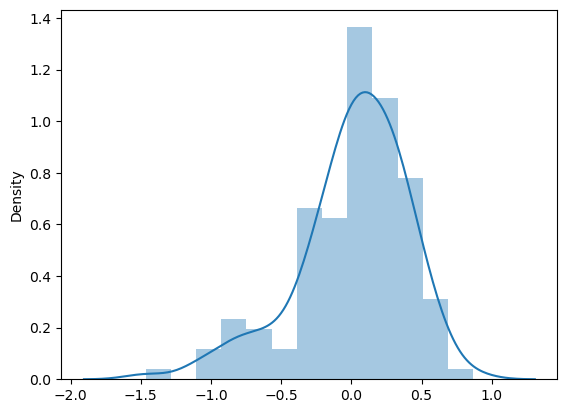

In [54]:
import seaborn as sns

sns.distplot(residuals)

### we had assumed normal distribution of error terms for linear regression to hold true, the plot of residuals above is close to normal distribution and confirms our assumption was correct, thus our linear regerssion model will be effective 